## Regression Model of NBA Player Shooting Stats

## Data visualization

In [124]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [125]:
data = pd.read_csv('nba_data_regular_season.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 965 entries, 0 to 964
Data columns (total 27 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         960 non-null    object 
 1   Season_type  960 non-null    object 
 2   PLAYER_ID    950 non-null    float64
 3   RANK         950 non-null    float64
 4   PLAYER       950 non-null    object 
 5   TEAM_ID      950 non-null    float64
 6   TEAM         950 non-null    object 
 7   GP           950 non-null    float64
 8   MIN          950 non-null    float64
 9   FGM          950 non-null    float64
 10  FGA          950 non-null    float64
 11  FG_PCT       950 non-null    float64
 12  FG3M         950 non-null    float64
 13  FG3A         950 non-null    float64
 14  FG3_PCT      950 non-null    float64
 15  FTM          950 non-null    float64
 16  FTA          950 non-null    float64
 17  FT_PCT       950 non-null    float64
 18  OREB         950 non-null    float64
 19  DREB    

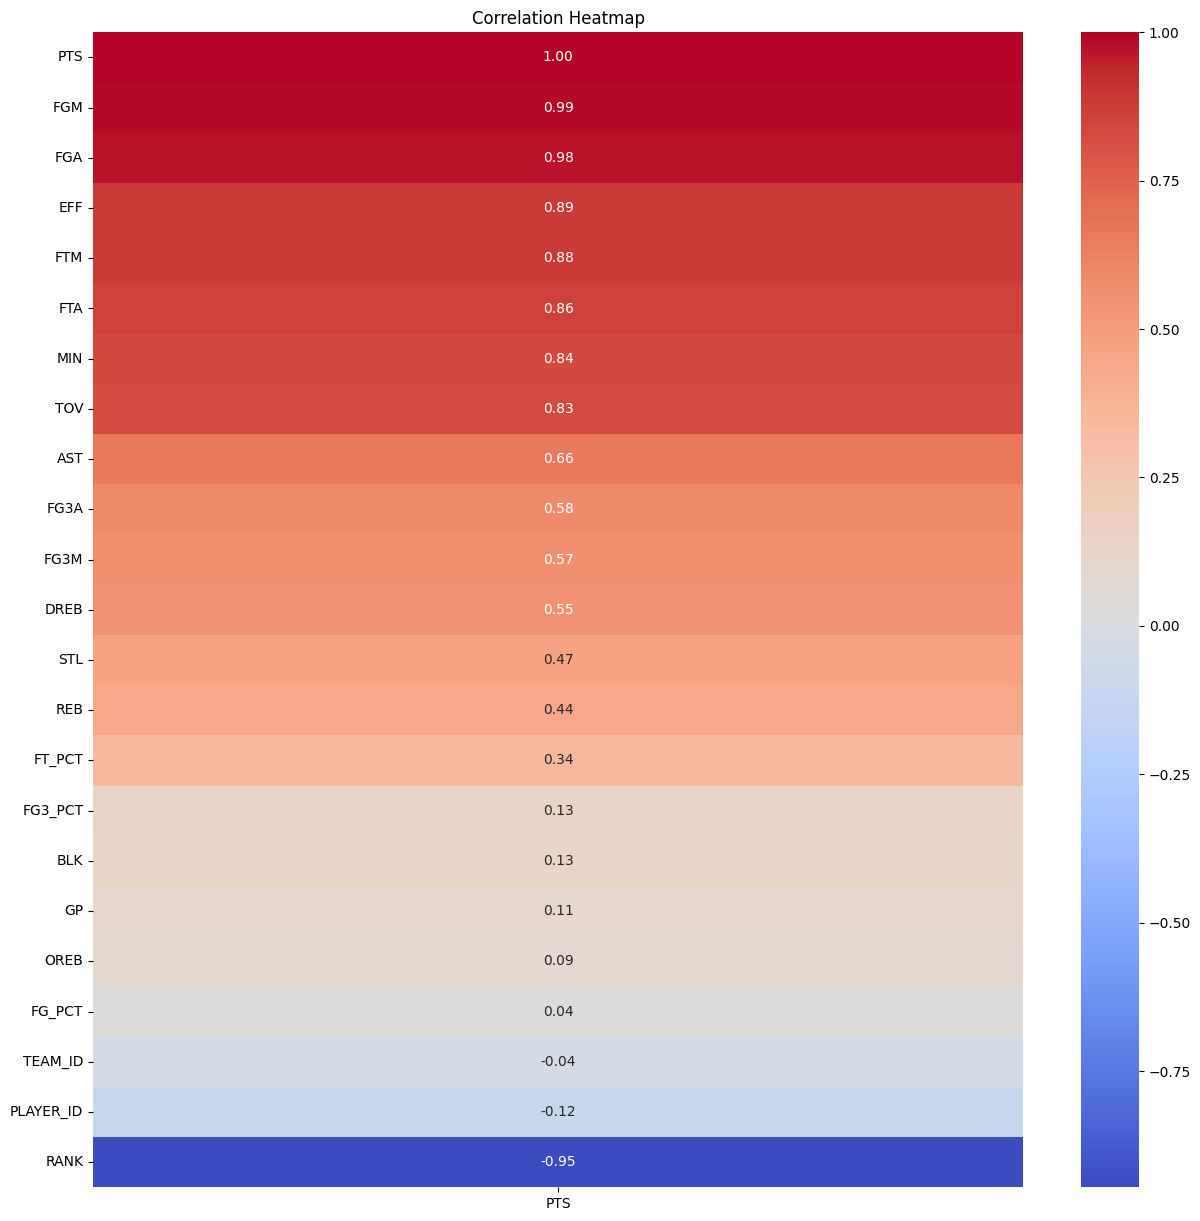

In [126]:
correlationMatrix = data.corr(numeric_only=True)
pointsCorrelation = correlationMatrix[['PTS']].sort_values(by = 'PTS', ascending=False)
plt.figure(figsize=(15, 15))  # Adjust the figure size as needed
sns.heatmap(pointsCorrelation, annot=True, cmap='coolwarm', fmt=".2f") # heatmap is with seaborn!!
plt.title("Correlation Heatmap")
plt.show()


In [127]:
data.isnull().sum() # checks missing values
print(data['PLAYER'][0])
print(data['PLAYER'][2])
print(data['PLAYER'][30])
print(data['Year'][0])

Stephen Curry
Damian Lillard
Domantas Sabonis
2020-21


### Clean the Data 

In [128]:
# Drop rows with any NaN values
data= data.dropna(axis=0, how="any")
data.isnull().sum() # checks missing values


Year           0
Season_type    0
PLAYER_ID      0
RANK           0
PLAYER         0
TEAM_ID        0
TEAM           0
GP             0
MIN            0
FGM            0
FGA            0
FG_PCT         0
FG3M           0
FG3A           0
FG3_PCT        0
FTM            0
FTA            0
FT_PCT         0
OREB           0
DREB           0
REB            0
AST            0
STL            0
BLK            0
TOV            0
PTS            0
EFF            0
dtype: int64

### Encode player names & Year


In [129]:
from sklearn.preprocessing import LabelEncoder

# Initialize the Label Encoder
label_encoder = LabelEncoder()

# Fit the encoder with the player names and transform them into integers
data['PLAYER_encoded'] = label_encoder.fit_transform(data['PLAYER'])
data['Year_encoded'] = label_encoder.fit_transform(data['Year'])

# Display the original player names and their encoded values
player_encoding = pd.DataFrame({
    'Player': data['PLAYER'],
    'Encoded': data['PLAYER_encoded'],
    'Year': data['Year'],
    'Year_en': data['Year_encoded']
})

# To avoid displaying too many rows, let's display the first few rows
print(player_encoding.head(10))
print(data['Year_encoded'][450])

                  Player  Encoded     Year  Year_en
0          Stephen Curry      381  2020-21        0
1           Bradley Beal       41  2020-21        0
2         Damian Lillard       82  2020-21        0
3            Joel Embiid      214  2020-21        0
4  Giannis Antetokounmpo      150  2020-21        0
5            Luka Doncic      282  2020-21        0
6            Zach LaVine      430  2020-21        0
7        Zion Williamson      433  2020-21        0
8           Kyrie Irving      271  2020-21        0
9           Jayson Tatum      204  2020-21        0
1


In [130]:
# Select relevant features and target variable
X = data[['PLAYER_encoded','MIN', 'FGM', 'FGA', 'FTM', 'FTA', 'EFF', 'TOV', 'AST', 'FG3A', 'FG3M', 'DREB','Year_encoded']]  # input features
y = data['PTS']  # Target variable


### Linear Regression Model

In [131]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# prediction = weight(x input) + bias y = mx + b 
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [132]:
# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 0.006004942562656364


In [133]:
# Create a DataFrame to display the first few predicted and actual values
results = pd.DataFrame({
    'Actual': y_test[:5],  # first 5 actual values
    'Predicted': y_pred[:5]  # first 5 predicted values
})
print(results)


     Actual  Predicted
868     9.6   9.599171
336    11.7  11.597939
283    17.2  17.219483
30     20.3  20.283711
168     7.6   7.626706
